### Kaden Garletts
### Date start: August 5th 2025, Date due: August 19th 2025 

  In core.ipynb, the conduction of webscraping of www.hackettstownbid.com, is used to perform Data Analysis used to answer several questions related to the planning of hackettstown busnisses, and to identify potential factors in business decisions. 

### The questions:
1. What type of businesses are the most popular in Hackettstown? "(ie. count per category compared to other categories)

2. Which types are the least popular?

3. Which businesses are closest to eachother

4. Which busineses are closest to businesses of related types? (using google maps API for matrix distance).

# Part 0.2: Exploratory Analysis of the Dataset Milestone #2

1. Becuase I chose to webscrape, its far harder to perform exploratory data analysis. 

a.describe(): There will not be a mean,std,min, or IQR --> but there will be the distance matrix

b.columns(): The columns are Restaurants, Community, Services, Shopping, and Entertainment/Gaming which have, names, and locations for rows

c.shape(): The shape of the data should be in 3 dimensions, as each row will be a list with name, and location

d.dtypes(): The datatypes should be float and string 

e.head(),tail(),sample() an example would be 'Mama's Cafe Baci', 40.8380252,-74.8263654 

f.info() 2 columns, x rows (probably ~50 per table) string, and float variable types.

# Part 0.3: Data Cleaning Report MileStone #3

For the first part of cleaning the data, I attempted to retrieve all of the names from each of the websites using beautiful soup. The first error I encountered when analysing my data was that there were missing names when I expected otherwise. To solve this I went into the HTML, and discovered that there were discrepancies on wether strong> tags were used or b> was used although they appeared the same. Solving this allowed for the full collection of names. 

Secondly, the adresses of each location are stored in the HTML aswell. I had issues reaching this one becuase they were stored in basic hyperlink tags without a coordinated identifier. I could have selected all of the hyper-links from an upper class, but It was diffiucult to access as all of the sub-classes had varying names. I discovered that becuase all of the sub-classes were similar in that they ended with thisClassx where x was a different number I could just iterate through every single class in order to store the links in a list. 

Further, the links are not what I needed, but rather the location, the initial plan was to just retrieve the coordiinates using the google map HTML, but I discovered that the extended link contains the coordinates. The issue is that the HackettstownBID website only provides the shortened link. To solve this, I am using requests to retrive the full URL from Google, but I am currently attempting to collect the data in a way that Google considers to not be bot activity. 

Afterwords, I will compare the length of the retirved data to the names to see if everything was collected appropriatly.

### Part 1: Webscraping https://hackettstownbid.com, and performing identifying measures to determine the categorization of businesses.

In [ ]:
# Project imports

from bs4 import BeautifulSoup #| beautifulsoup4 used for parsing HTML
import requests as req #| requests used for making HTTP requests
import re #| re used for regular expressions
import seaborn as sns #| seaborn used for data visualization
import matplotlib.pyplot as plt #| matplotlib used for plotting graphs
import pandas as pd #| pandas used for data manipulation and analysis
import numpy as np #| numpy used for numerical operations
from geopy.distance import geodesic, great_circle #used to calculate geo-distance
import time #| used to pause the system breifly
from dotenv import load_dotenv # used to store sensitive info
import os #| Used to interact with the operating system
import pickle #| used to store data between runs
import random
from scipy.cluster.hierarchy import linkage, dendrogram # used to plot a dendogram, a figure I learned in intro to Data Science
from scipy.spatial.distance import squareform # used for dendogram calculations

load_dotenv() #loading sensitive info

True

In [27]:
# Project URL's

urlHackettstownResaurants = "https://hackettstownbid.com/explore/restaurants/"
urlHackettstownServices = "https://hackettstownbid.com/explore/services/"
urlHackettstownShopping = "https://hackettstownbid.com/explore/shopping/"
urlHackettstownEntertainmentGaming = "https://hackettstownbid.com/explore/entertainment-gaming/"
urlHackettstownCommunity = "https://hackettstownbid.com/explore/community/"

# Any businesses that are not included on the above pages are not registred with the Hackettstown Business Improvement Discrict

In [28]:
# Using requests to fetch the HTML content of the pages

responseHackettstownResaurants = req.get(urlHackettstownResaurants)
responseHackettstownServices = req.get(urlHackettstownServices)
responseHackettstownShopping = req.get(urlHackettstownShopping)
responseHackettstownEntertainmentGaming = req.get(urlHackettstownEntertainmentGaming)
responseHackettstownCommunity = req.get(urlHackettstownCommunity)

In [29]:
#parsing the html content into text through requests .text object

htmlContentHackettstownResaurants = responseHackettstownResaurants.text
htmlContentHackettstownServices = responseHackettstownServices.text
htmlContentHackettstownShopping = responseHackettstownShopping.text
htmlContentHackettstownEntertainmentGaming = responseHackettstownEntertainmentGaming.text
htmlContentHackettstownCommunity = responseHackettstownCommunity.text

In [30]:
#creating BeautifulSoup objects for each html
soupHackettstownRestaurants = BeautifulSoup(htmlContentHackettstownResaurants, 'html.parser')
soupHackettstownServices = BeautifulSoup(htmlContentHackettstownServices, 'html.parser')
soupHackettstownShopping = BeautifulSoup(htmlContentHackettstownShopping, 'html.parser')
soupHackettstownEntertainmentGaming = BeautifulSoup(htmlContentHackettstownEntertainmentGaming, 'html.parser')
soupHackettstownCommunity = BeautifulSoup(htmlContentHackettstownCommunity, 'html.parser')

# Part 2: Extracting the content and storing the data into dataframe/s

In [ ]:
# Extracting the names of the businesses from the HTML content


def getBusinessNames(soupHackettstown):
    # https://stackoverflow.com/questions/68144219/how-to-scrape-text-from-strong-tag used to learn how to scrape from a strong tag

    # Finds all of the strong tags in fusion class --> where names are stored
    strongHackettstown = [[i.get_text(strip=True) for i in div.find_all("strong")]
        for div in soupHackettstown.find_all(
            "div",
            class_="fusion-column-wrapper fusion-column-has-shadow fusion-flex-justify-content-flex-start fusion-content-layout-column"
        )]
    
    # Some of the names are stored in bold vs. being stored in strong tags
    bHackettstown = [[i.get_text(strip=True) for i in div.find_all("b")]
        for div in soupHackettstown.find_all(
            "div",
            class_="fusion-column-wrapper fusion-column-has-shadow fusion-flex-justify-content-flex-start fusion-content-layout-column"
        )]
    
    # limits the list to only what are lists
    strongHackettstown = [hList for hList in strongHackettstown if hList] #Assigns the var to only items that are lists
    strongHackettstown.pop(0) # Removes the first item which says "call us"

    # same assignment but for the bold tags
    bHackettstown = [hList for hList in bHackettstown if hList]
    bHackettstown.pop(0)

    # combination of the seperate lists
    namesHackettstown = [item for slist in strongHackettstown for item in slist] + [item for slist in bHackettstown for item in slist]
    return namesHackettstown

# Utilizing the method to retrieve names
namesHackettstownRestaurants = getBusinessNames(soupHackettstownRestaurants)
namesHackettstownCommunity = getBusinessNames(soupHackettstownCommunity)
namesHackettstownEntertainmentGaming = getBusinessNames(soupHackettstownEntertainmentGaming)    
namesHackettstownServices = getBusinessNames(soupHackettstownServices)
namesHackettstownShopping = getBusinessNames(soupHackettstownShopping)

# Data cleaning via empty string removal
namesHackettstownRestaurants = [i for i in namesHackettstownRestaurants if i != '']
namesHackettstownCommunity = [i for i in namesHackettstownCommunity if i != '']
namesHackettstownEntertainmentGaming = [i for i in namesHackettstownEntertainmentGaming if i != ['']]   
namesHackettstownServices = [i for i in namesHackettstownServices if i != '']
namesHackettstownShopping = [i for i in namesHackettstownShopping if i != '']

# found this regex thanks to the internet to filter out phone number names.
def isPhoneNumber(s):
    return bool(re.search(r'\(?\d{3}\)?[-\s]?\d{3}[-\s]?\d{4}', s))

# utilizing the phone number method to remove any phone numbers from the restaurants
namesHackettstownRestaurants = [i for i in namesHackettstownRestaurants if not isPhoneNumber(i)]
namesHackettstownCommunity = [i for i in namesHackettstownCommunity if not isPhoneNumber(i)]
namesHackettstownEntertainmentGaming = [i for i in namesHackettstownEntertainmentGaming if not isPhoneNumber(i)]
namesHackettstownServices = [i for i in namesHackettstownServices if not isPhoneNumber(i)]
namesHackettstownShopping = [i for i in namesHackettstownShopping if not isPhoneNumber(i)]

['Hackettstown Center of the Arts', 'Hackettstown Community Pool', 'Historical Society Museum', 'American Legion Post 164', 'Hackettstown Community Center', 'Hackettstown Rescue Squad', 'Hackettstown Rotary Club', 'Knights of Columbus', 'Kiwanis Club of Hackettstown', 'Loyal Order of Moose Lodge 816', 'Soroptimist Int’l of Hackettstown', 'Centenary University', 'Hackettstown Board of Education', 'Hackettstown High School', 'Hackettstown Middle School', 'Hatchery Hill Elementary School', 'Willow Grove Elementary School', 'Animal Warden', 'Building Inspector/Construction Agency', 'Department of Public Works', 'Fire Department', 'Fire Official', 'Hackettstown Municipal Utilities Authority (HMUA)', 'Hackettstown Post Office', 'Landlord Registration Bureau', 'Municipal Assessor', 'Municipal Building', 'Municipal Court', 'Parking Authority', 'Police Department', 'Recreation Department', 'Tax Collector', 'Town Engineer/Planner', 'Treasurer / CFO', 'Vital Statistics Records', 'Zoning Official'

In [ ]:

# Extracts the links of the businesses locations from the HTML
def getBusinessLocations(soupHackettstown, progress_pickle=None):
    
    fusionTextNumber = 1  # increments for the naming convention of the divs
    classHackettstown = []  # List to store the divs with the class fusion-text-fusionTextNumber
    linksHackettstown = []  # List to store the links
    soupIteration = True

    #used to iterate and retrieve all of the fusion texts until it begins to return empty.
    # --------------------------------------------------------------------------------
    while soupIteration:

        # appends the soup from each div to a list of divs.
        classHackettstown.append(
            soupHackettstown.find_all(
                "div", {"class": "fusion-text fusion-text-" + str(fusionTextNumber)}
            )
        )  # Finds all divs with the class fusion-text-fusionTextNumber
        fusionTextNumber += 1  # Increments the fusionTextNumber to find the next div
        if fusionTextNumber >= 20:
            if (
                classHackettstown[-1] == []
                and classHackettstown[-2] == []
                and classHackettstown[-3] == []
            ):  # If the last three items in classHackettstown are empty the loop ends
                soupIteration = False
    # --------------------------------------------------------------------------------

    # Flatten the list of lists into a single list
    #---------------------------------------------------------------------------------
    classHackettstown = [item for sublist in classHackettstown for item in sublist]

    for i in classHackettstown:
        linkTags = i.find_all("a")  # Finds all <a> tags in the divs
        for j in linkTags:  # Iterates through each <a> tag
            href = j.get("href")  # Gets the href attribute of the <a> tag
            if href and (
                href.startswith("https://goo.gl/maps/")
                or href.startswith("https://maps.app.goo.gl/")
            ):  # Checks if the link starts with the Google Maps URL
                linksHackettstown.append(href)  

    if len(linksHackettstown) > 100:
        linksTo100 = linksHackettstown[:100]
        linksPast100 = linksHackettstown[100:]
    # ---------------------------------------------------------------------------------

    # process used to store information if the pickle cannot be completed.
    expandedLinks = None
    start_index = 0
    if progress_pickle is not None:
        try:
            with open(progress_pickle, "rb") as pf:
                expandedLinks = pickle.load(pf)
            # I used google for isInstance, and returning the exception, but not the try and except.
            if not isinstance(expandedLinks, list) or len(expandedLinks) > len(linksHackettstown):
                print("Progress file inconsistent with current scrape; restarting progress.")
                expandedLinks = []
        except FileNotFoundError:
            expandedLinks = []
        except Exception as e:
            print("Could not read progress pickle, starting fresh:", e)
            expandedLinks = []

        # When adding to the pickle, it checks the length of the imported list.
        start_index = len(expandedLinks)

        # google utilized for code help here aswell... ):
        for k in range(min(start_index, len(linksHackettstown))):
            if isinstance(expandedLinks[k], str) and expandedLinks[k].startswith("http"):
                linksHackettstown[k] = expandedLinks[k]

    #starts with nothing if the list cant be retrieved
    if expandedLinks is None:
        expandedLinks = []


    # This code below uses requests to lenghthen the short url provided by HackettstownBID to the long provided by GoogleMAPS
    # ---------------------------------------------------------------------------------
    countTo49 = 0
    countTo100 = 0
    countLocationsCaptured = start_index
    randTime = (random.random() + 3)

    # Starts iteration through the previously aquired short links.
    for i in range(start_index, len(linksHackettstown)):

        print("Attempting session for index", i)
        session = req.Session() #creates a new session every loop
        print("Attempting Head")

        try:
            # from basic requests tutorial
            resp = session.head(linksHackettstown[i], allow_redirects=True, timeout=30)
            print("Attempt resp.url")
            finalUrl = resp.url
            linksHackettstown[i] = finalUrl
            expandedLinks.append(finalUrl)

        except Exception as e:
            # If head fails, keep the original short link so you can inspect later
            print(f"Head failed for index {i} ({linksHackettstown[i]}): {e}")
            expandedLinks.append(linksHackettstown[i])

        #basic sleep and random variables
        randTime = (random.random() + 3)
        time.sleep(randTime)  # Sleep to avoid Google getting mad... which barely works btw
        countTo49 += 1
        countTo100 += 1
        countLocationsCaptured += 1
        print(countLocationsCaptured)

        # pauses for numerous requests
        if countTo49 == 20:
            print("sleeping for batch pause")
            time.sleep(125 + randTime)
            countTo49 = 0
        if countTo100 == 100:
            print("sleeping for 100 pause")
            time.sleep(300 + randTime)
            countTo100 = 0

        # Save progress to progress_pickle after each processed link (if provided)
        if progress_pickle is not None:
            try:
                with open(progress_pickle, "wb") as pf:
                    pickle.dump(expandedLinks, pf)
            except Exception as e:
                print("Failed to save progress pickle:", e)

    # After expanding all links, if > 100 it splits
    if len(linksHackettstown) > 100:
        svc1_file = "hackettstown_locations_services1.pkl"
        svc2_file = "hackettstown_locations_services2.pkl"
        linksTo100 = linksHackettstown[:100]
        linksPast100 = linksHackettstown[100:]

        # creates services1 if it does not 
        try:
            with open(svc1_file, "rb") as f:
                # exists
                pass
        except FileNotFoundError:
            try:
                with open(svc1_file, "wb") as f:
                    pickle.dump(linksTo100, f)
                print(f"Saved first 100 links to {svc1_file}")
            except Exception as e:
                print("Failed to save services1 pickle:", e)

        # create services2 if it does not
        try:
            with open(svc2_file, "rb") as f:
                # exists 
                pass
        except FileNotFoundError:
            try:
                with open(svc2_file, "wb") as f:
                    pickle.dump(linksPast100, f)
                print(f"Saved remaining links to {svc2_file}")
            except Exception as e:
                print("Failed to save services2 pickle:", e)

    time.sleep(20 + randTime)
    print("Sleeping")

    return expandedLinks



# Attempting to load the pickle, and if it does not function call
#------------------------------------------------------------------------
try:
    with open("hackettstown_locations_restaurants.pkl", "rb") as f:
        print("Loading pickle...")
        locationHackettstownRestaurants = pickle.load(f)
        print(len(locationHackettstownRestaurants))
except FileNotFoundError:
    print("Could not find file... attempting to retrieve data")
    locationHackettstownRestaurants = getBusinessLocations(soupHackettstownRestaurants, progress_pickle="hackettstown_locations_restaurants.pkl")
    print("Data retrieved! now adding to collection")
    with open("hackettstown_locations_restaurants.pkl", "wb") as f:
        pickle.dump(locationHackettstownRestaurants, f)

try:
    with open("hackettstown_locations_community.pkl", "rb") as f:
        print("Loading pickle...")
        locationHackettstownCommunity = pickle.load(f)
        print(len(locationHackettstownCommunity))
except FileNotFoundError:
    print("Could not find file... attempting to retrieve data")
    locationHackettstownCommunity = getBusinessLocations(soupHackettstownCommunity, progress_pickle="hackettstown_locations_community.pkl")
    print("Data retrieved! now adding to collection")
    with open("hackettstown_locations_community.pkl", "wb") as f:
        pickle.dump(locationHackettstownCommunity, f)

try:
    with open("hackettstown_locations_entertainmentgaming.pkl", "rb") as f:
        print("Loading pickle...")
        locationHackettstownEntertainmentGaming = pickle.load(f)
        print(len(locationHackettstownEntertainmentGaming))
except FileNotFoundError:
    print("Could not find file... attempting to retrieve data")
    locationHackettstownEntertainmentGaming = getBusinessLocations(soupHackettstownEntertainmentGaming, progress_pickle="hackettstown_locations_entertainmentgaming.pkl")
    print("Data retrieved! now adding to collection")
    with open("hackettstown_locations_entertainmentgaming.pkl", "wb") as f:
        pickle.dump(locationHackettstownEntertainmentGaming, f)

all_services = None

try:
    with open("hackettstown_locations_services1.pkl", "rb") as f:
        print("Loading services1 pickle...")
        locationHackettstownServices1 = pickle.load(f)
        print(len(locationHackettstownServices1))
except FileNotFoundError:
    print("services1 pickle missing; retrieving services links now...")
    all_services = getBusinessLocations(soupHackettstownServices, progress_pickle="hackettstown_locations_services_progress.pkl")
    try:
        with open("hackettstown_locations_services1.pkl", "rb") as f:
            locationHackettstownServices1 = pickle.load(f)
    except FileNotFoundError:
        locationHackettstownServices1 = all_services[:100] if len(all_services) >= 100 else all_services
        with open("hackettstown_locations_services1.pkl", "wb") as f:
            pickle.dump(locationHackettstownServices1, f)
        print("Created services1 pickle from retrieved data.")

try:
    with open("hackettstown_locations_services2.pkl", "rb") as f:
        print("Loading services2 pickle...")
        locationHackettstownServices2 = pickle.load(f)
        print(len(locationHackettstownServices2))
except FileNotFoundError:
    print("services2 pickle missing; ensuring we have services data...")
    if all_services is None:
        all_services = getBusinessLocations(soupHackettstownServices, progress_pickle="hackettstown_locations_services_progress.pkl")
    locationHackettstownServices2 = all_services[100:] if len(all_services) > 100 else []
    with open("hackettstown_locations_services2.pkl", "wb") as f:
        pickle.dump(locationHackettstownServices2, f)
    print("Created services2 pickle from retrieved data.")

try:
    with open("hackettstown_locations_shopping.pkl", "rb") as f:
        print("Loading pickle...")
        locationHackettstownShopping = pickle.load(f)
        print(len(locationHackettstownShopping))
except FileNotFoundError:
    print("Could not find file... attempting to retrieve data")
    locationHackettstownShopping = getBusinessLocations(soupHackettstownShopping, progress_pickle="hackettstown_locations_shopping.pkl")
    print("Data retrieved! now adding to collection")
    with open("hackettstown_locations_shopping.pkl", "wb") as f:
        pickle.dump(locationHackettstownShopping, f)
#-----------------------------------------------------------------------------------

Loading pickle...
58
Loading pickle...
44
Loading pickle...
9
Loading services1 pickle...
100
Loading services2 pickle...
168
Loading pickle...
83


In [ ]:
# Function to extract coordinates from a list of Google Maps URLs

def getCoordinates(locationHackettstown):
    coordsHackettstown = []

    # regex was created using the help of the internet
    for url in locationHackettstown:
        match = re.search(r'@(-?\d+(?:\.\d+)?),(-?\d+(?:\.\d+)?)', url)
        if match:
            try:
                latitudeLocation = float(match.group(1)) # used stackOverflow to learn .group()
                longitudeLocation = float(match.group(2))
            except ValueError:
                # fallback if conversion fails (which caused lots of issues actually)
                latitudeLocation = 0.0
                longitudeLocation = 0.0
                print(f"Could not convert coords to float for URL: {url}")
        else:
            print(f"No coordinates found in URL: {url}")
            latitudeLocation = 0.0
            longitudeLocation = 0.0

        coordsHackettstown.append((latitudeLocation, longitudeLocation))

    return coordsHackettstown

# create coordinate lists 
coordinateHackettstownRestaurants = getCoordinates(locationHackettstownRestaurants)
coordinateHackettstownShopping = getCoordinates(locationHackettstownShopping)
coordinateHackettstownServices1 = getCoordinates(locationHackettstownServices1)
coordinateHackettstownServices2 = getCoordinates(locationHackettstownServices2)
coordinateHackettstownEntertainmentGaming = getCoordinates(locationHackettstownEntertainmentGaming)
coordinateHackettstownCommunity = getCoordinates(locationHackettstownCommunity)

# combines the services, which had too long of lists into 1 
coordinateHackettstownServices = [list(i) for i in coordinateHackettstownServices1] + [list(i) for i in coordinateHackettstownServices2]


No coordinates found in URL: https://maps.app.goo.gl/wnbJN8ajumo2SKpS9
No coordinates found in URL: https://maps.app.goo.gl/qqysscXcqR4cMcs78
No coordinates found in URL: https://maps.app.goo.gl/QYUzYR84sErpMHvA7
No coordinates found in URL: https://www.google.com/maps/search/40.849575,+-74.824398?entry=tts
No coordinates found in URL: https://maps.app.goo.gl/6aseNQURKQyw9Wut6
No coordinates found in URL: https://goo.gl/maps/8nTPxw7WgbdZ5xLH9
No coordinates found in URL: https://maps.app.goo.gl/hqbyFQeY2xWR1eD1A
No coordinates found in URL: https://maps.app.goo.gl/X27rkKGXA7k4nTUJ6
No coordinates found in URL: https://maps.app.goo.gl/m1jCLUHpy
58
44
9
268
83
56
44
7
268
81


In [40]:
#method used to combine the names of the businesses and their coordinates. I will admit there was probably a bettwer way to do this, to verify that the coordinates belong to each business, but I cannot figure out exactly how

def truncate_pair(list_a, list_b):
    min_len = min(len(list_a), len(list_b))
    return list_a[:min_len], list_b[:min_len]

# caling the method
namesHackettstownRestaurants, coordinateHackettstownRestaurants = truncate_pair(namesHackettstownRestaurants, coordinateHackettstownRestaurants)
namesHackettstownCommunity, coordinateHackettstownCommunity = truncate_pair(namesHackettstownCommunity, coordinateHackettstownCommunity)
namesHackettstownEntertainmentGaming, coordinateHackettstownEntertainmentGaming = truncate_pair(namesHackettstownEntertainmentGaming, coordinateHackettstownEntertainmentGaming)
namesHackettstownServices, coordinateHackettstownServices = truncate_pair(namesHackettstownServices, coordinateHackettstownServices)
namesHackettstownShopping, coordinateHackettstownShopping = truncate_pair(namesHackettstownShopping, coordinateHackettstownShopping)



# Part 3: Answering Question 1. and 2.

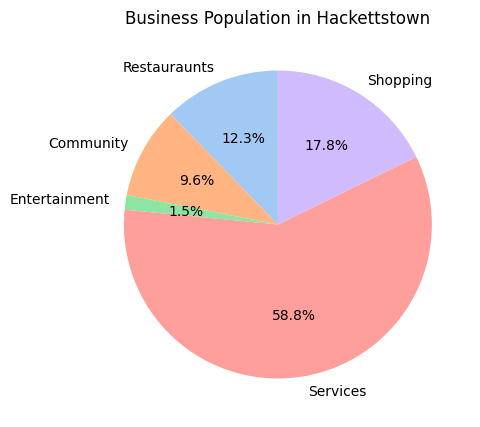

In [35]:
# Using previous information we can determine the popularity of specific business types in Hackettstown.
# To demostrate this, I decided to use a pie graph to show the percentage that each type of data represents.

valueBusinesses = [len(namesHackettstownRestaurants),len(namesHackettstownCommunity),len(namesHackettstownEntertainmentGaming),len(namesHackettstownServices),len(namesHackettstownShopping)]
labelBusinesses = ["Restauraunts", "Community", "Entertainment", "Services", "Shopping"]
colors = sns.color_palette("pastel")[0:len(valueBusinesses)]

totalBusinesses = sum(valueBusinesses)
percentBusinesses = [(i / totalBusinesses) * 100 for i in valueBusinesses]

plt.figure(figsize=(5,5))
plt.pie(valueBusinesses, labels=labelBusinesses, autopct=lambda p: f"{p:.1f}%", startangle=90, colors=colors)
plt.title("Business Population in Hackettstown")
plt.show()



# Part 4: Creating a pandas Dataframe to store the location and business names

In [ ]:


# For this I will create indavidual dataframes for each category of location, further to combine the data later, I will be using data flattening methods.
namesHackettstownRestaurants = namesHackettstownRestaurants
dataRestaurants = pd.DataFrame({
    'Name': namesHackettstownRestaurants,
    'Latitude': [coord[0] for coord in coordinateHackettstownRestaurants],
    'Longitude': [coord[1] for coord in coordinateHackettstownRestaurants]
})
dataShopping = pd.DataFrame({
    'Name': namesHackettstownShopping,
    'Latitude': [coord[0] for coord in coordinateHackettstownShopping],
    'Longitude': [coord[1] for coord in coordinateHackettstownShopping]
})
dataServices = pd.DataFrame({
    'Name': namesHackettstownServices,
    'Latitude': [coord[0] for coord in coordinateHackettstownServices],
    'Longitude': [coord[1] for coord in coordinateHackettstownServices]
})
dataEntertainmentGaming = pd.DataFrame({
    'Name': namesHackettstownEntertainmentGaming,
    'Latitude': [coord[0] for coord in coordinateHackettstownEntertainmentGaming],
    'Longitude': [coord[1] for coord in coordinateHackettstownEntertainmentGaming]
})
dataCommunity = pd.DataFrame({
    'Name': namesHackettstownCommunity,
    'Latitude': [coord[0] for coord in coordinateHackettstownCommunity],
    'Longitude': [coord[1] for coord in coordinateHackettstownCommunity]
})

#creates a combined version of the data
dataBusinesses = pd.concat([
    dataRestaurants,
    dataShopping,
    dataServices,
    dataEntertainmentGaming,
    dataCommunity
], ignore_index=True)

                              Name   Latitude  Longitude
0          Centenary Stage Company  40.846258 -74.837400
1  Hackettstown Center of the Arts  43.201258 -71.537326
2              Oasis Online Arcade  40.853832 -74.832663
3                The Dragons Hoard  40.855969 -74.836255
4                 Wooten Clayworks  40.835388 -74.828349
5                   StrikeForce NJ   0.000000   0.000000
6           Super Science for Kids  40.852947 -74.832751


In [37]:
# After many hours of data collection and cleaning, its time for the data analysis, my favorite part. I will admit that google maps links dont provide very accurate coordinates
# their coordinate search function also doesnt function as expected, that is I copied directly from their hyperlink and repasted it and was sent to the wrong location. 
# The coordinates do not match up with their exact locations, so in the future, what would best is to take the appropriate route and use an API for coordinate data.
# Although I would like to make that switch, I simply do not have enough time, as I have spent numerous hours on data collection and cleaning.
# Without further ado,

# Answering Questions 3 and 4

# Part 5. Answering Questions 3, and 4

Name                            B&R Uniform   Divine Kin  \
Name                                                       
B&R Uniform                        0.000000    44.341117   
Divine Kin                        44.341117     0.000000   
El Primo Boutique & Sportswear  1115.687816  1072.884391   
G&G’s Big Closet                  82.937177   120.505968   
Jeniffer Fashion & Accessories   190.403782   223.599697   

Name                            El Primo Boutique & Sportswear  \
Name                                                             
B&R Uniform                                        1115.687816   
Divine Kin                                         1072.884391   
El Primo Boutique & Sportswear                        0.000000   
G&G’s Big Closet                                   1166.017213   
Jeniffer Fashion & Accessories                     1220.460256   

Name                            G&G’s Big Closet  \
Name                                               
B&R Uniform 

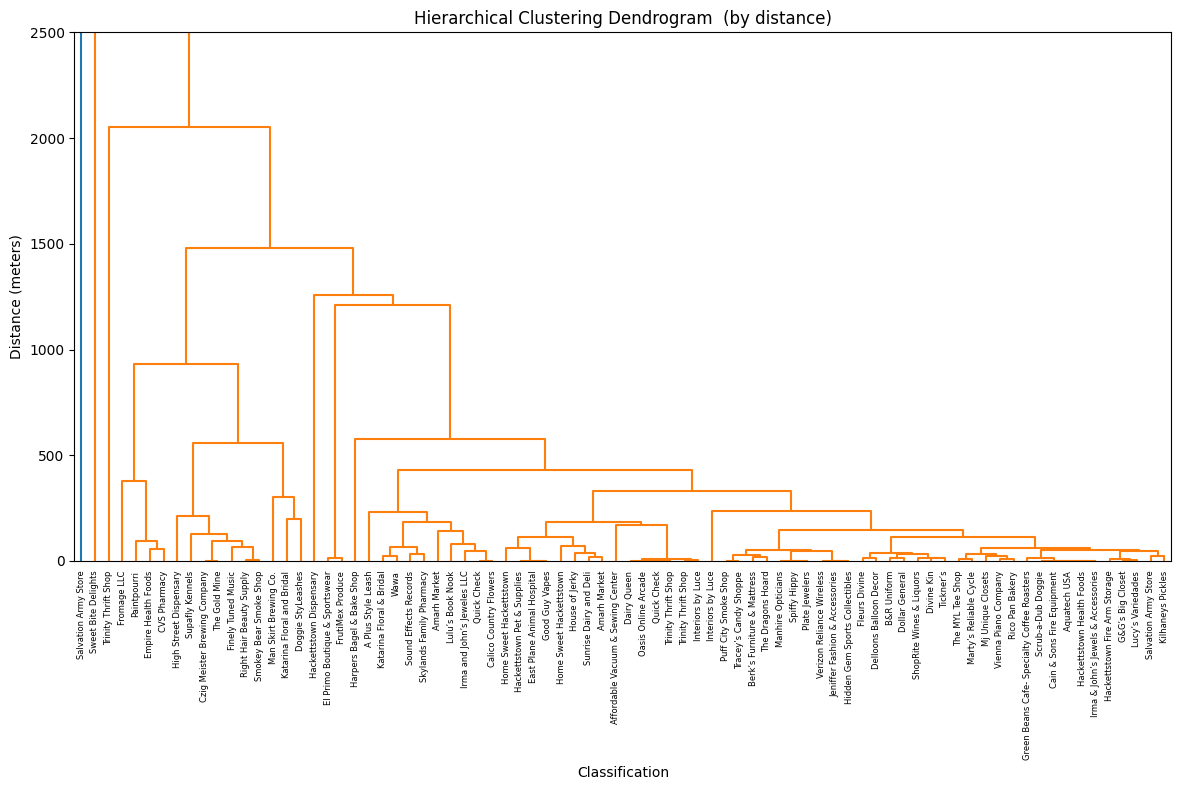

Name                             Hackettstown Center of the Arts  \
Name                                                               
Hackettstown Center of the Arts                         0.000000   
Hackettstown Community Pool                          8070.196319   
Historical Society Museum                             520.502392   
American Legion Post 164                             2809.493328   
Hackettstown Community Center                        2213.475392   

Name                             Hackettstown Community Pool  \
Name                                                           
Hackettstown Center of the Arts                  8070.196319   
Hackettstown Community Pool                         0.000000   
Historical Society Museum                        7758.490829   
American Legion Post 164                        10074.107237   
Hackettstown Community Center                    9054.372777   

Name                             Historical Society Museum  \
Name        

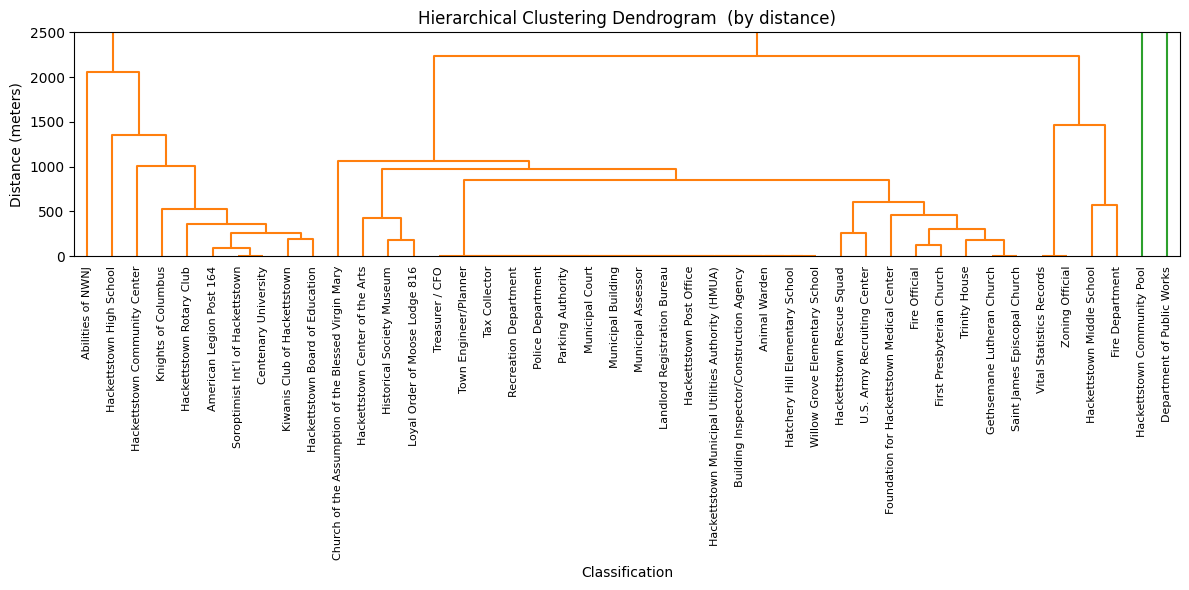

Name                  30 Burgers  Grand Avenue Tavern  James On Main  \
Name                                                                   
30 Burgers              0.000000          1546.632399    1409.834982   
Grand Avenue Tavern  1546.632399             0.000000     205.391354   
James On Main        1409.834982           205.391354       0.000000   
Coach Room           3545.743906          2100.984595    2297.339462   
Grand Avenue Tavern  2344.672573           933.991106    1138.474462   

Name                  Coach Room  Grand Avenue Tavern  
Name                                                   
30 Burgers           3545.743906          2344.672573  
Grand Avenue Tavern  2100.984595           933.991106  
James On Main        2297.339462          1138.474462  
Coach Room              0.000000          1202.647752  
Grand Avenue Tavern  1202.647752             0.000000  


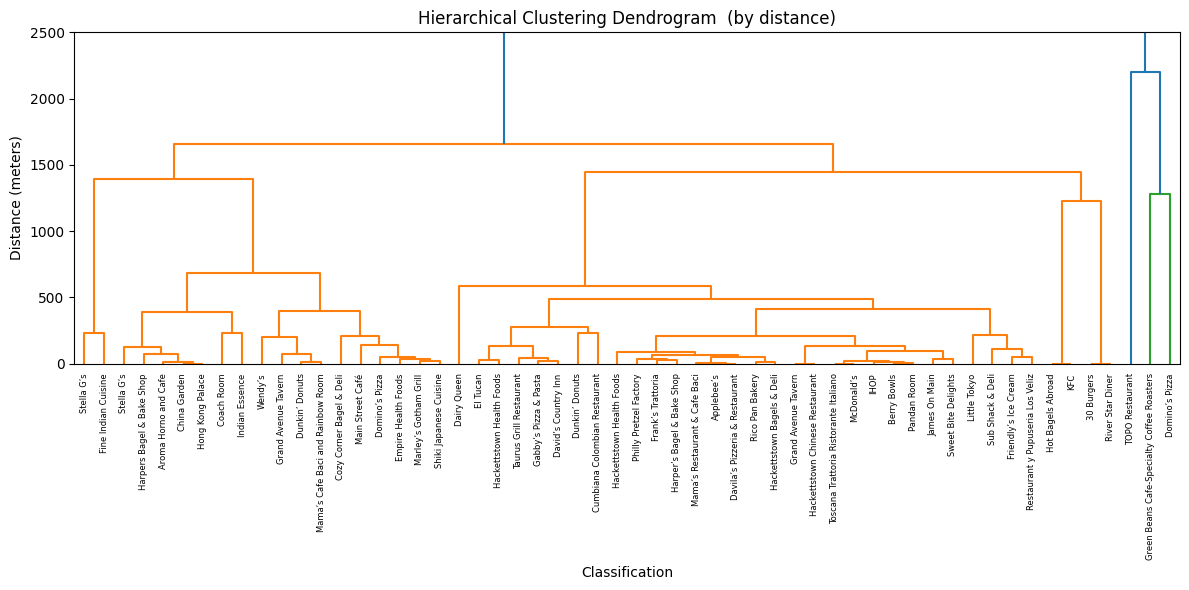

Name                             Centenary Stage Company  \
Name                                                       
Centenary Stage Company                         0.000000   
Hackettstown Center of the Arts            378255.711571   
Oasis Online Arcade                           931.093766   
The Dragons Hoard                            1082.697649   
Wooten Clayworks                             1428.201698   

Name                             Hackettstown Center of the Arts  \
Name                                                               
Centenary Stage Company                            378255.711571   
Hackettstown Center of the Arts                         0.000000   
Oasis Online Arcade                                377379.564578   
The Dragons Hoard                                  377427.508472   
Wooten Clayworks                                   378568.049459   

Name                             Oasis Online Arcade  The Dragons Hoard  \
Name                       

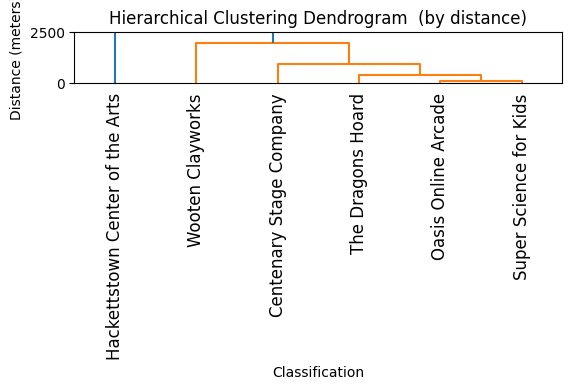

Name                    Raquet, Sean  Cruise Planners  Wooten Clayworks  \
Name                                                                      
Raquet, Sean                0.000000       320.940633        264.870576   
Cruise Planners           320.940633         0.000000        268.914281   
Wooten Clayworks          264.870576       268.914281          0.000000   
5 Brothers Auto Repair   3609.738288      3321.899243       3567.401213   
AAMCO Total Car Care     3609.738288      3321.899243       3567.401213   

Name                    5 Brothers Auto Repair  AAMCO Total Car Care  
Name                                                                  
Raquet, Sean                       3609.738288           3609.738288  
Cruise Planners                    3321.899243           3321.899243  
Wooten Clayworks                   3567.401213           3567.401213  
5 Brothers Auto Repair                0.000000              0.000000  
AAMCO Total Car Care                  0.000000  

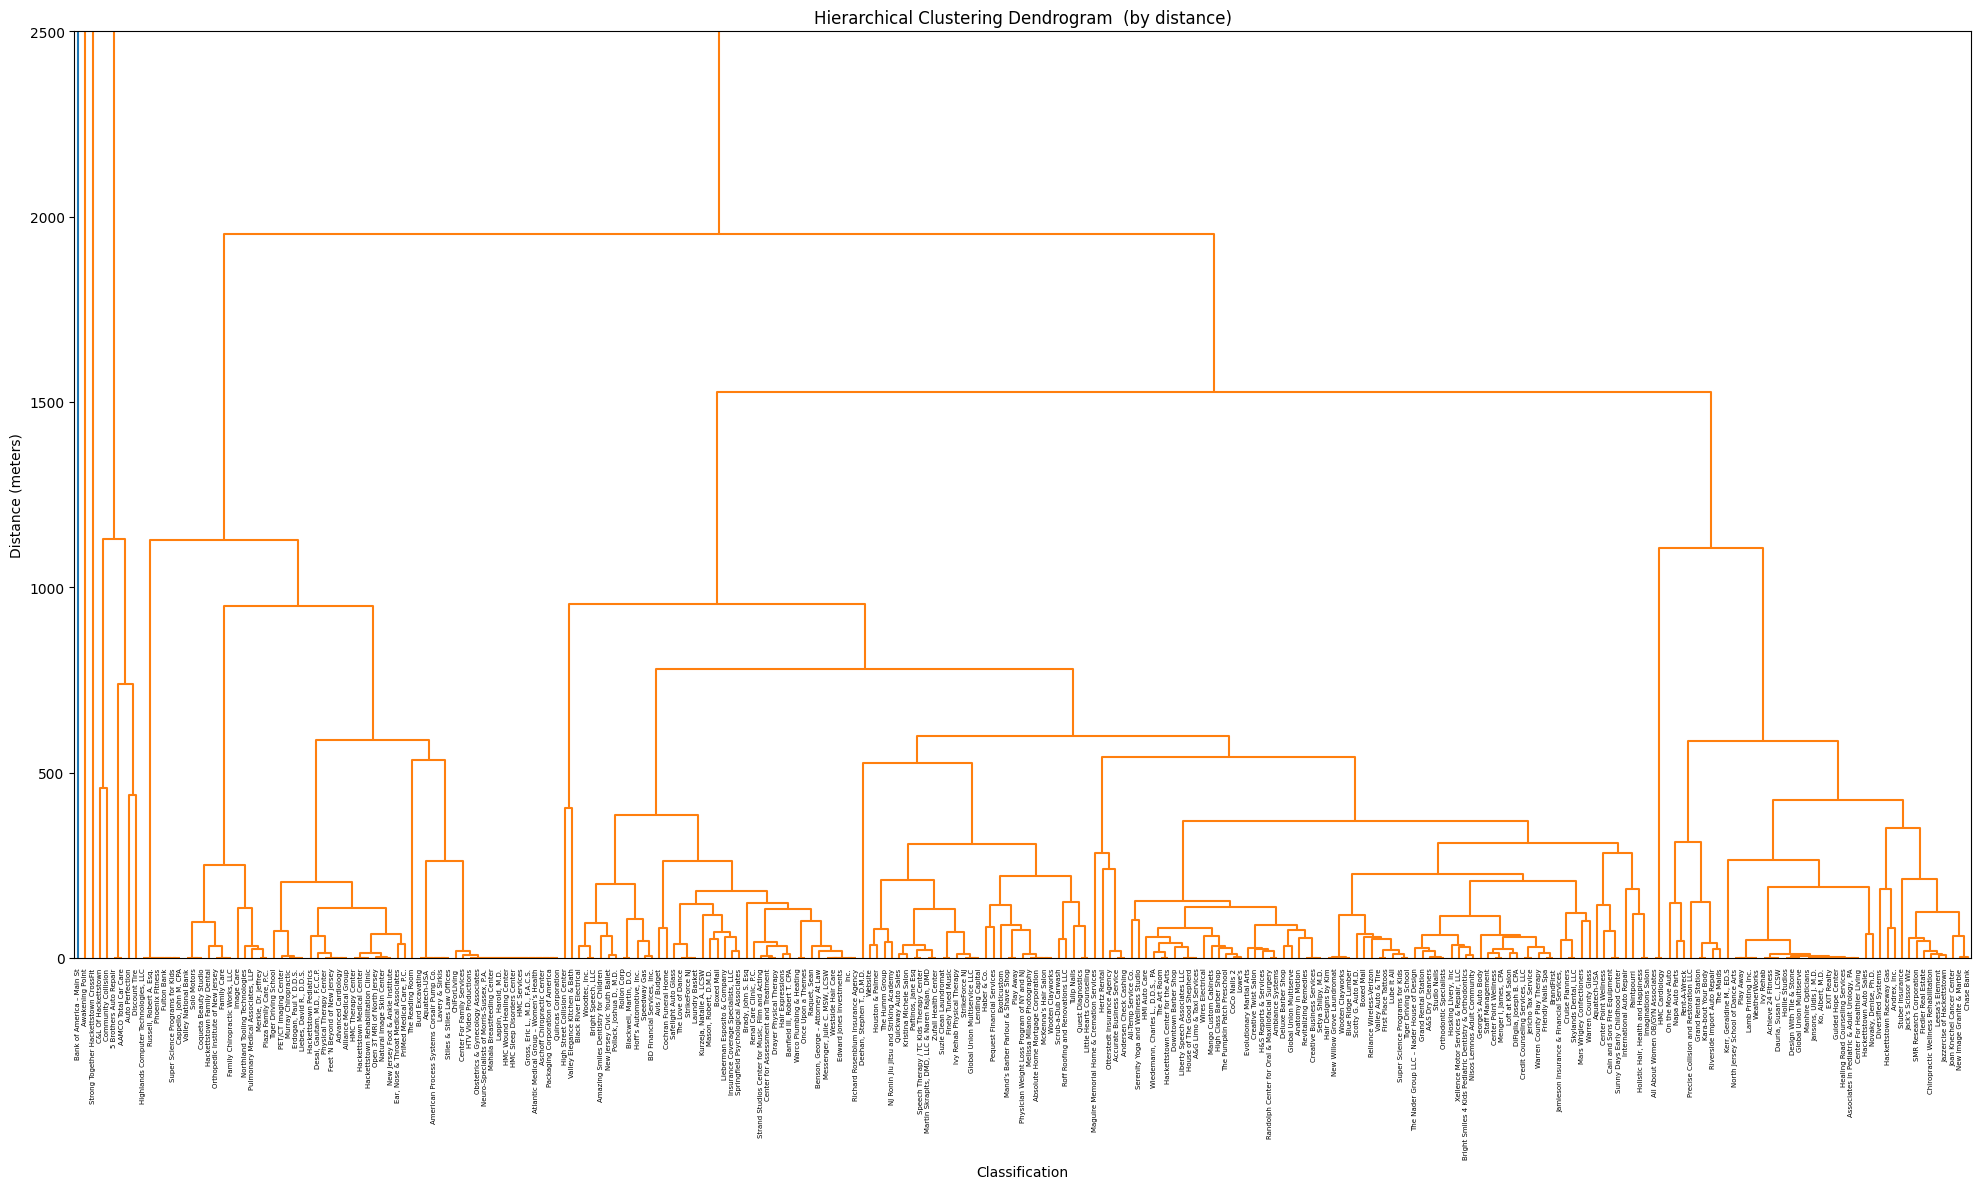

Name                  30 Burgers  Grand Avenue Tavern  James On Main  \
Name                                                                   
30 Burgers              0.000000          1546.632399    1409.834982   
Grand Avenue Tavern  1546.632399             0.000000     205.391354   
James On Main        1409.834982           205.391354       0.000000   
Coach Room           3545.743906          2100.984595    2297.339462   
Grand Avenue Tavern  2344.672573           933.991106    1138.474462   

Name                  Coach Room  Grand Avenue Tavern  
Name                                                   
30 Burgers           3545.743906          2344.672573  
Grand Avenue Tavern  2100.984595           933.991106  
James On Main        2297.339462          1138.474462  
Coach Room              0.000000          1202.647752  
Grand Avenue Tavern  1202.647752             0.000000  


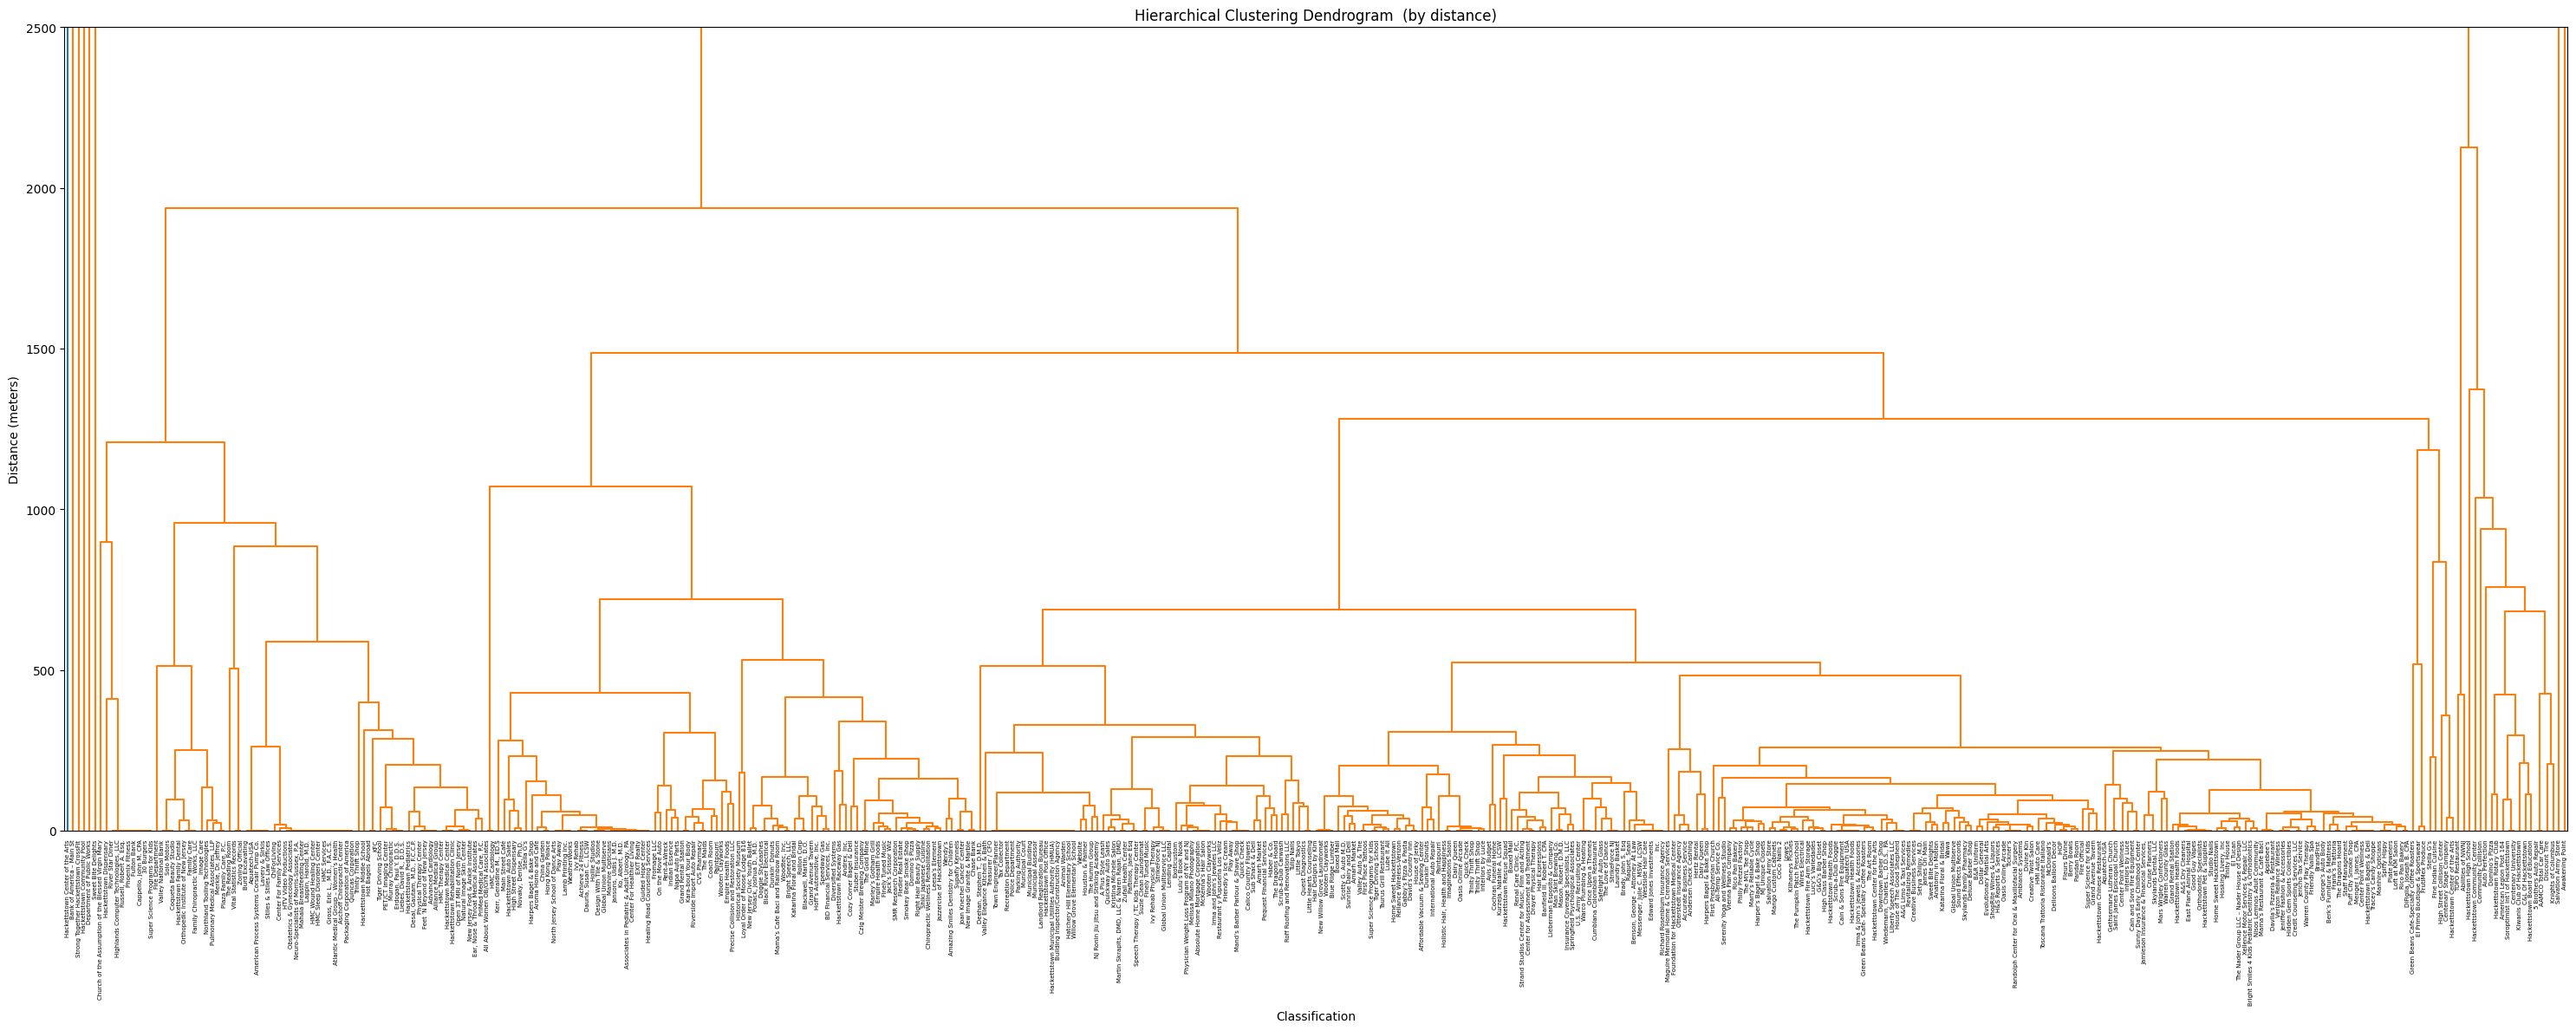

In [ ]:
# For learning to use geopy vvvv
# https://stackoverflow.com/questions/36696613/calculating-distance-between-multiple-sets-of-geo-coordinates-in-python

# method used to create the matrix and dendogram of the data 
def matrixAndDiagram(inData, sizeX, sizeY):

    inData = inData.dropna(subset=['Latitude', 'Longitude'])
    inData = inData[(inData['Latitude'] != 0.0) & (inData['Longitude'] != 0.0)]

    coordRestaurants = list(zip(inData['Latitude'], inData['Longitude']))
    nRestaurants = len(coordRestaurants)
    distanceMatrixRestaurants = np.zeros((nRestaurants,nRestaurants))

    for i in range(nRestaurants):
        for j in range(nRestaurants):
            distanceMatrixRestaurants[i][j] = geodesic(coordRestaurants[i], coordRestaurants[j]).meters

    distanceRestaurants = pd.DataFrame(distanceMatrixRestaurants, index=inData['Name'], columns=inData['Name'])
    print(distanceRestaurants.iloc[:5, :5])

    # For learning to use scipy dendogram
    # https://stackoverflow.com/questions/66884461/how-can-i-extract-the-distances-between-points-within-a-dendogram-in-python

    condensedD = squareform(distanceMatrixRestaurants)

    # Perform hierarchical clustering
    linked = linkage(condensedD, method='average')

    # Plot dendrogram
    plt.figure(figsize=(sizeX, sizeY))
    dendrogram(
        linked,
        labels=inData['Name'].values,
        orientation='top',
        distance_sort='ascending',
        leaf_rotation=90
    )
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Classification')
    plt.ylabel('Distance meters')
    plt.tight_layout()
    plt.ylim(0, 2500)  
    plt.show()

matrixAndDiagram(dataShopping, 12, 8)
matrixAndDiagram(dataCommunity, 12, 6)
matrixAndDiagram(dataRestaurants, 12, 6)
matrixAndDiagram(dataEntertainmentGaming, 6, 4)
matrixAndDiagram(dataServices, 20, 12)
matrixAndDiagram(dataBusinesses, 30, 12)

To answer Question 3.  3. Which businesses are closest to eachother, for example we can see in the full data dendogram that the services often seem to be togethr, restaurants are also typically locayted close to one another, and the other categories are scattered throughout. With this information, we can determine that if we were to open up a restaurant then we might actually want to place it closer to our competitors, rather than farther away.


To answer question 4. 4. Which busineses are closest to businesses of related types? 

For restaurants we can see from the dendogram that businesses like hackettstown health foods and El tucan are close together. Although it doesnt yet provide any insight to what type of restarants (would need futher classification) are next to eachother. Although there are errors in the data, it appears to be relatively accurate to the actuall map. For example in the dendogram, IHOP, McDonalds, Pandan Room and Berry bowls are next to eachother as they are in real life, but there are a few inconsistencies, such as Wendies being next to the tavern, when it should be Applebee's or WaWa.

For the entertainment, as displayed by the dendogram, we can see that they are all relatively close to eachother, with the exception of the dragons hoard, Oasis, and the science center. So, perhaps it would be lucrative to start an entertainment business withen the scope of those businesses. 

For the services we can see that hiring services seem to be somewhat close to one another, which services that require in person are closer together. 


# Part 6. Conclusions, Foward, and Remarks

Conclusively, I would say that my analysis was a fail, although when embarking on exploratory data anaysis, you never know what kind of issues you will encounter. That is why its always important to persevere and try again with new strategies. In some instances, you have to take large steps back, therefore If I were to re-do this it would be with far more accurate data, using the extended hyperlinks to receive coordinate into from google maps provides useless data. I beleive this may have been a countermeasure they implemented to prevent botting. I saw the warning signs yet still proceeded becuase I wanted to practice and perform to the best of my ability webscraping of a harder to scrape website. Moving foward, I would actually do the same thing again if it got to mean I learned what I learned, I significantly advanced my web scraping and cleaning abilities, sometimes giving yourself challenges you aren't sure you can acomplish are the best ways to experience new things and grow... even if has its consequences. As a final remark, I would like to thank anyone viewing this final-project of mine while taking the Data Science Programming Course at County College of Morris. 

Thank you, Kaden Garletts.